# Определение перспективного тарифа для телеком-компании

## Получение и изучение данных

In [18]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')
print('-----------Звонки:-----------')
display(calls)
print('-----------Интернет:-----------')
display(internet)
print('-----------Сообщения:-----------')
display(messages)
print('-----------Тарифы:-----------')
display(tariffs)
print('-----------Пользователи:-----------')
display(users)

-----------Звонки:-----------


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


-----------Интернет:-----------


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


-----------Сообщения:-----------


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


-----------Тарифы:-----------


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


-----------Пользователи:-----------


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Сделали все необходимые, для исследования импорты. Открыли все данные, которые находятся в 5ти разных таблицах.

## Предобработка данных

### Перевод в формат даты

In [19]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y.%m.%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y.%m.%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y.%m.%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y.%m.%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y.%m.%d')

#print(users['reg_date'].max())
#print(messages['message_date'].max())
#print(internet['session_date'].max())
#print(calls['call_date'].max())


today = calls['call_date'].max()

def days_of_use(registr_date):
    days = today - registr_date
    return days

inactive_users = users[users['churn_date'].notnull()]
#users = users[users['churn_date'].isna()]

users['days_of_use'] = users['reg_date'].apply(days_of_use)
inactive_users['days_of_use'] = inactive_users['churn_date'] - inactive_users['reg_date']
#users.drop(['churn_date'], axis = 1, inplace = True)
display(users.head(5))
display(inactive_users.head(5))

/tmp/ipykernel_36/3123472631.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_users['days_of_use'] = inactive_users['churn_date'] - inactive_users['reg_date']


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,days_of_use
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,220 days
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,60 days
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,197 days
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,136 days
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,231 days


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,days_of_use
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,142 days
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart,57 days
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart,87 days
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra,109 days
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart,139 days


#### Вывод
Во всех таблицах я перевел формат даты в корректный, для того, что бы с ним можно было работать. Далее я отфильтровал всех пользователей на активных и неактивных. В дальнейшем буду работать с датасетом только активных пользователей, так как цель исследования - понять, в какой тариф выгоднее вкладывать рекламный бюджет на будущее. Я думаю, что логичнее это делать по текущему поведению пользователей. Написал функцию, которая показывает, сколько дней человек пользуется тарифом. Для этого взял самый последний звонок в выборке за дату выгрузки датасета.

### Изменение типов данных

In [20]:
calls['duration'] = calls['duration'].apply(math.ceil)

#### Вывод
Округлил в большую сторону значения, исходя из комментариев к датасету: "«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся."

### Добавление данных, необходимых для исследования

In [21]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

#### Вывод
Плата по обоим тарифам взымается за месяц. Для исследования добавил новый столбец с месяцем в выборки.

In [22]:
calls_pivot = (calls
               .pivot_table(index = ['user_id', 'month'], values = ['duration'], aggfunc = ['count', 'sum'])
               .rename(columns = {'count': 'total_calls', 'sum': 'total_minutes'})
              )
messages_pivot = (messages
               .pivot_table(index = ['user_id', 'month'], values = ['message_date'], aggfunc = ['count'])
               .rename(columns = {'count': 'total_messages'})
              )
internet_pivot = (internet
               .pivot_table(index = ['user_id', 'month'], values = ['mb_used'], aggfunc = ['sum'])
               .rename(columns = {'count': 'total_mb_used'})
                 )
display(calls_pivot)
display(messages_pivot)
display(internet_pivot)

total_calls total_minutes
                 duration      duration
user_id month                          
1000    5              22           159
        6              43           172
        7              47           340
        8              52           408
        9              58           466
...                   ...           ...
1498    10             41           247
1499    9               9            70
        10             68           449
        11             74           612
        12             69           492

[3174 rows x 2 columns]

total_messages
                message_date
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
...                      ...
1498    10                42
1499    9                 11
        10                48
        11                59
        12                66

[2717 rows x 1 columns]

sum
                mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

#### Вывод
Сделал сводные таблицы по каждому датасету, для дальейшего слияния данных значений с суммами по каждому пользователю за месяц.

In [23]:
user_tariff = users.loc[:,['user_id', 'tariff','city']]
all_pivot = (calls_pivot
             .merge(messages_pivot, on = ['user_id', 'month'], how = 'outer')
             .merge(internet_pivot, on = ['user_id', 'month'], how = 'outer')
             .merge(user_tariff, on = ['user_id'], how = 'outer')
             .reset_index()
            )

all_pivot.columns = [' '.join(col).strip() for col in all_pivot.columns.values]

all_pivot.rename({'total_messages message_date' : 'total_messages_send', 
                 'sum mb_used': 'mb_used', 't a r i f f': 'tariff',
                  'total_calls duration': 'total_calls', 'total_minutes duration': 'total_minutes',
                 'u s e r _ i d': 'user_id', 'c i t y': 'city'}, 
                 axis = 1, inplace = True)
del all_pivot['i n d e x']
all_pivot.fillna({'total_calls' : 0, 
                 'total_minutes' : 0,
                  'total_messages_send' : 0,
                  'mb_used' : 0},
                 inplace = True)

all_pivot = all_pivot.astype({'total_calls' : 'int', 
                 'total_minutes' : 'int',
                  'total_messages_send' : 'int',
                  'mb_used' : 'int'})
n = 1024
y=1000
all_pivot['mb_used'] = all_pivot['mb_used'].apply(lambda x: y * math.ceil(x/n))

def monthly_revenue(row):
    revenue = 0
    user_id = row['user_id']
    monthly_calls_duration = row['total_calls']
    monthly_minutes_duration = row['total_minutes']
    monthly_messages_send = row['total_messages_send']
    monthly_mb_used = row['mb_used']
    tariff = row['tariff']
    if tariff == 'ultra':
        revenue += tariffs.loc[1, 'rub_monthly_fee']
        if monthly_minutes_duration - tariffs.loc[1,'minutes_included'] < 0:
            revenue += 0 
        else:
            revenue += (monthly_minutes_duration - tariffs.loc[1,'minutes_included'])*tariffs.loc[1, 'rub_per_minute']
            
        if monthly_messages_send - tariffs.loc[1,'messages_included'] < 0:
            revenue += 0
        else:
            revenue += (monthly_messages_send - tariffs.loc[1,'messages_included'] < 0)*tariffs.loc[1, 'rub_per_message']
        if monthly_mb_used - tariffs.loc[1,'mb_per_month_included'] < 0:
            revenue += 0
        else:
            extra_gb = math.ceil((monthly_mb_used - tariffs.loc[1,'mb_per_month_included'])/n)
            revenue += extra_gb * tariffs.loc[1,'rub_per_gb']
    if tariff == 'smart':
        revenue += tariffs.loc[0, 'rub_monthly_fee']
        if monthly_minutes_duration - tariffs.loc[0,'minutes_included'] < 0:
            revenue += 0 
        else:
            revenue += (monthly_minutes_duration - tariffs.loc[0,'minutes_included'])*tariffs.loc[0, 'rub_per_minute']
            
        if monthly_messages_send - tariffs.loc[0,'messages_included'] < 0:
            revenue += 0
        else:
            revenue += (monthly_messages_send - tariffs.loc[0,'messages_included'] < 0)*tariffs.loc[0, 'rub_per_message']
        if monthly_mb_used - tariffs.loc[0,'mb_per_month_included'] < 0:
            revenue += 0
        else:
            extra_gb = math.ceil((monthly_mb_used - tariffs.loc[0,'mb_per_month_included'])/n)
            revenue += extra_gb * tariffs.loc[0,'rub_per_gb']
    return revenue

all_pivot['monthly_revenue'] = all_pivot.apply(monthly_revenue, axis = 1)
all_pivot.tail(15)

/opt/conda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,user_id,total_calls,total_minutes,total_messages_send,mb_used,tariff,city,monthly_revenue
3201,1328,0,0,6,22000,ultra,Мурманск,1950
3202,1328,0,0,8,35000,ultra,Мурманск,2700
3203,1328,0,0,7,39000,ultra,Мурманск,3300
3204,1473,0,0,17,13000,ultra,Красноярск,1950
3205,1473,0,0,19,17000,ultra,Красноярск,1950
3206,1473,0,0,20,14000,ultra,Красноярск,1950
3207,1473,0,0,14,22000,ultra,Красноярск,1950
3208,1473,0,0,20,18000,ultra,Красноярск,1950
3209,1489,0,0,17,11000,smart,Санкт-Петербург,550
3210,1489,0,0,32,17000,smart,Санкт-Петербург,950


#### Вывод
Обьеденил все таблицы в одну. Для расчета прибыли округлил мегабайты (исходя из комментария к датасету), используя лямбда-функцию. Далее написал функцию, которая принимает строку как параметр и в теле функции происходит расчет прибыли. Строки мы используем из сводной таблицы, которую создавали ранее, индексами служат пользователь + месяц, следовательно функцией мы считаем прибыль от конкретного пользователя в конкретный месяц. Добавляем новый столбец 'monthly_revenue' с результатами расчетов.

## Проанализируйте данные

tariff          mean                                                  \
               mb_used monthly_revenue total_calls total_messages_send   
0  smart  16321.524664     1272.249776   58.437220           33.369058   
1  ultra  19474.645030     2068.509128   73.318458           49.313387   

                 
  total_minutes  
0    417.747534  
1    526.089249

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


----------------------------------------------------------


'total_calls'

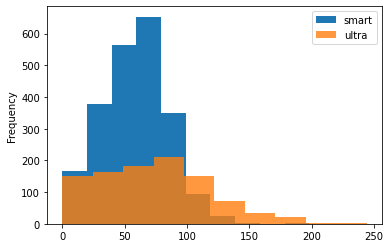

Среднее значение в тарифе smart составляет 58.437
Среднее значение в тарифе ultra составляет 73.318
Дисперсия значений в тарифе smart составляет 673.805
Дисперсия значений в тарифе ultra составляет 1930.235
Стандартное отклонение в тарифе smart составляет 25.958
Стандартное отклонение в тарифе ultra составляет 43.934
----------------------------------------------------------


'total_minutes'

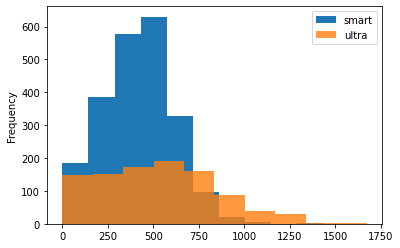

Среднее значение в тарифе smart составляет 417.748
Среднее значение в тарифе ultra составляет 526.089
Дисперсия значений в тарифе smart составляет 36265.124
Дисперсия значений в тарифе ultra составляет 100950.006
Стандартное отклонение в тарифе smart составляет 190.434
Стандартное отклонение в тарифе ultra составляет 317.726
----------------------------------------------------------


'total_messages_send'

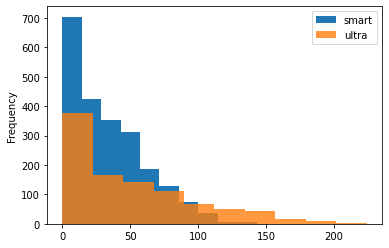

Среднее значение в тарифе smart составляет 33.369
Среднее значение в тарифе ultra составляет 49.313
Дисперсия значений в тарифе smart составляет 796.598
Дисперсия значений в тарифе ultra составляет 2283.100
Стандартное отклонение в тарифе smart составляет 28.224
Стандартное отклонение в тарифе ultra составляет 47.782
----------------------------------------------------------


'mb_used'

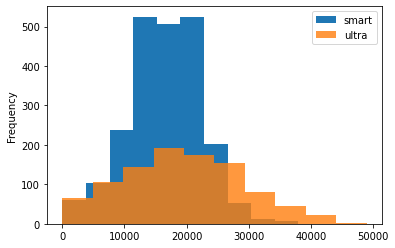

Среднее значение в тарифе smart составляет 16321.525
Среднее значение в тарифе ultra составляет 19474.645
Дисперсия значений в тарифе smart составляет 33118594.985
Дисперсия значений в тарифе ultra составляет 97279783.089
Стандартное отклонение в тарифе smart составляет 5754.876
Стандартное отклонение в тарифе ultra составляет 9863.051


In [24]:
pivot_tariffs = (all_pivot
                 .pivot_table(index = ['tariff'],
                              values = ['total_calls', 'total_minutes', 'total_messages_send', 
                                        'mb_used', 'monthly_revenue'],
                              aggfunc = ['mean'])
                 .reset_index()
                )
display(pivot_tariffs)
columns_to_visualization = ['total_calls','total_minutes','total_messages_send','mb_used']
#tariffs = ['ultra', 'smart']
display(tariffs)
for column in columns_to_visualization:
    print('----------------------------------------------------------')
    smart = all_pivot.query('tariff == "smart"')
    ultra = all_pivot.query('tariff == "ultra"')
    smart_included = tariffs.query('tariff_name == "smart"')
    ultra_included = tariffs.query('tariff_name == "ultra"')
    mean_smart = smart[column].mean()
    mean_ultra = ultra[column].mean()
    variance_estimate_smart = np.var(smart[column])
    variance_estimate_ultra = np.var(ultra[column])
    standard_deviation_smart = np.std(smart[column])
    standard_deviation_ultra = np.std(ultra[column])
    #Построим графики:
    smart[column].plot(kind='hist', label = 'smart')
    ultra[column].plot(kind='hist', label = 'ultra', alpha = 0.8)
    display(column)
    plt.legend()
    plt.show()
    print(f'Среднее значение в тарифе smart составляет {mean_smart:.3f}')
    print(f'Среднее значение в тарифе ultra составляет {mean_ultra:.3f}')
    print(f'Дисперсия значений в тарифе smart составляет {variance_estimate_smart:.3f}')
    print(f'Дисперсия значений в тарифе ultra составляет {variance_estimate_ultra:.3f}')
    print(f'Стандартное отклонение в тарифе smart составляет {standard_deviation_smart:.3f}')
    print(f'Стандартное отклонение в тарифе ultra составляет {standard_deviation_ultra:.3f}')


### Вывод
Стандратное отклонение показывает, что разброс данных у пользователей тарифа 'ultra' больше. Это говорит о том, что пользователи более склонны превышать лимит тарифа по всем показателям (минуты, гигабайты, кол-во сообщений), несмотря на то, что лимит у данного тарифа - больше, это подтверждают и графики. Так же:

- Почти все пользователи тарифа 'ultra' не используют и 50% включенных в пакет смс, в то время пользователи тарифа 'smart' в среднем используют 70% включенных в пакет сообщений.
- В среднем пользователи тарифа 'smart' используют больше гб, включенных в пакет и переплачивают за 2 гб.

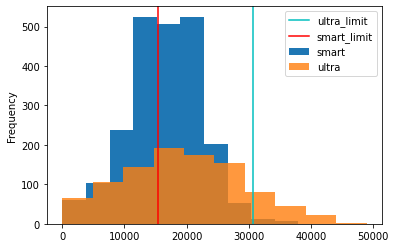

In [25]:
# Код ревьюера

ax = smart['mb_used'].plot(kind='hist', label = 'smart')
ultra['mb_used'].plot(kind='hist', label = 'ultra', alpha = 0.8)
ax.axvline(tariffs.loc[tariffs['tariff_name'] == 'ultra', 'mb_per_month_included'].squeeze(), label='ultra_limit', color='c')
ax.axvline(tariffs.loc[tariffs['tariff_name'] == 'smart', 'mb_per_month_included'].squeeze(), label='smart_limit', color='red')
plt.legend()

## Шаг 4. Проверьте гипотезы

### Гипотеза 1
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Нулевая гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

Альтернативная гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.

In [26]:
smart_revenue = all_pivot.query('tariff == "smart"')['monthly_revenue']
ultra_revenue = all_pivot.query('tariff == "ultra"')['monthly_revenue']
alpha = .05
results_tariff = st.ttest_ind(
    smart_revenue, 
    ultra_revenue)
p_value_tariff = results_tariff.pvalue
print('p-значение:', p_value_tariff)

if p_value_tariff < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.15215016389188e-169
Отвергаем нулевую гипотезу


#### Вывод
Мы берем 2 генеральные совокупности, по тарифам 'smart' и 'ultra', так как они не зависят друг от друга и средние значения в них нормально распределены. Нулевую гипотезу я формировал как утверждение, которое принимается верным верным, если отбрасывается альтернативная гитпотеза. В данном случае то, что средняя выручка пользователей обоих тарифов равны. 

### Гипотеза 2
Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

Альтернативная гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.

In [27]:
moscow_revenue = all_pivot.query('city == "Москва"')['monthly_revenue']
other_revenue = all_pivot.query('city != "Москва"')['monthly_revenue']
alpha = .05
results_city = st.ttest_ind(
    moscow_revenue, 
    other_revenue)
p_value_city = results_city.pvalue
print('p-значение:', p_value_city)

if p_value_city < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.442103377547158
Не получилось отвергнуть нулевую гипотезу


Принцип формулирования гипотезы такой же как и в гипотезе 1. Вероятность получить одинаковые значения из двух выборок составляет 0,0009 следовательно отвергаем нулевую гипотезу.

# Общий вывод

Помимо того, что ежемесячная плата за тариф 'ultra' больше, пользователи данного тарифа более склонны превышать лимит по минутам, кол-ву смс и гигабайтам,что влечет за собой дополнительную прибыль. Если быть кратким, то я рекомендую направить рекламный бюджет именно на развитие данного тарифа, в среднем он приносит на ~700 рублей больше за каждого уникального пользователя в месяц. 
Так же я заметил что пользователи тарифа 'ultra' не тратят даже половину включенных в тариф смс, перераспределение ресурсов включенных в пакет может служить как привлечением новых пользователей, так и увеличением лояльности уже действующих. Например, увеличение гигабайт, включенных в пакет, путем уменьшения кол-ва смс.  

In [28]:
count_ultra_users = 0
exceed_ultra_users = 0
count_smart_users = 0
exceed_smart_users = 0
ultra_users = all_pivot.query('tariff == "ultra"')['monthly_revenue']
smart_users = all_pivot.query('tariff == "smart"')['monthly_revenue']
for revenue in ultra_users:
    count_ultra_users += 1
    if revenue > 1950:
        exceed_ultra_users += 1

for revenue in smart_users:
    count_smart_users += 1
    if revenue > 1950:
        exceed_smart_users += 1
    
display(f'Процент пользователей, которые превысили ежемесячную плату по тарифу ultra: {exceed_ultra_users/count_ultra_users:.0%}')
display(f'Процент пользователей, которые превысили ежемесячную плату по тарифу smart: {exceed_smart_users/count_smart_users:.0%}')

'Процент пользователей, которые превысили ежемесячную плату по тарифу ultra: 14%'

'Процент пользователей, которые превысили ежемесячную плату по тарифу smart: 18%'

In [29]:
# Код ревьюера

(all_pivot.query('tariff == "ultra"')['monthly_revenue'] > 1950).mean()

0.1359026369168357

In [30]:
(all_pivot.query('tariff == "smart"')['monthly_revenue'] > 550).mean()

0.6946188340807175